### 파이토치 텐서

In [1]:
# pytoch tensor
import torch

a = torch.tensor([1,2,3,4])
print(a)
print(type(a))
print(a.dtype) # 데이터 타입
print(a.shape) # tensor 모양

tensor([1, 2, 3, 4])
<class 'torch.Tensor'>
torch.int64
torch.Size([4])


In [2]:
A = torch.tensor([[1,2,3],[4,5,6]])
print(A)
print(A.ndim) # 차원수
print(A.numel()) # 전체 attribute 개수

tensor([[1, 2, 3],
        [4, 5, 6]])
2
6


In [3]:
print(torch.zeros(5))
print(torch.zeros_like(A))
print(torch.ones(5))
print(torch.zeros(3,3))

tensor([0., 0., 0., 0., 0.])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([1., 1., 1., 1., 1.])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
print(torch.arange(1,10,2)) # 1부터 9까지 2 간격으로
print(torch.linspace(0,10,10)) # 0에서 10까지 10개를 만들어라

tensor([1, 3, 5, 7, 9])
tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])


In [5]:
# 벡터의 합
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
c = a+b
print(c)

tensor([5, 7, 9])


In [6]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])

c = a*b
d = a/b

print(c) # 그냥 곱하는건 성분별 곱, 나누기 (hadamard product)
print(d)

tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])


In [8]:
# 실제 행렬의 곱은 @
# matmul도 존재하지만 @로도 가능
a = torch.tensor([[1, 2],[1,2]])
b = torch.tensor([[4, 5],[1,1]])
print(a@b)

tensor([[6, 7],
        [6, 7]])


### 파이토치 슬라이싱

In [10]:
 #리스트와 동일하다!
a = torch.tensor([1,2,3,4])
print(a[0])
print(a[-1])
print(a[1:3])
print(a[:3])
print(a[:])

tensor(1)
tensor(4)
tensor([2, 3])
tensor([1, 2, 3])
tensor([1, 2, 3, 4])


In [16]:
a = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print()

# 이렇게하면 리스트안에 한 행에대한 인덱싱
print(a[0])
print(a[-1])
print(a[1:])
print()

print(a[1,0:3:2]) # 2번째 행에서, 0부터 2열까지 2간격으로
print(a[:,2]) # 모든 행에 대해서 3번째 열
print(a[:][2]) # a[:] = a임
# 참고 a[1][2]는 스칼라값을 추출, a[1:2]은 텐서를 슬라이싱해서 또 텐서

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

tensor([1, 2, 3])
tensor([7, 8, 9])
tensor([[4, 5, 6],
        [7, 8, 9]])

tensor([4, 6])
tensor([3, 6, 9])
tensor([7, 8, 9])


In [17]:
# 3차원 행렬 인덱싱
A=torch.tensor([ [[0,1,2,3],[4,5,6,7],[8,9,10,11]] ,
                 [[12,13,14,15],[16,17,18,19],[20,21,22,23]] ])

print(A)
print(A.shape)
print(A[0,1,2])
# A[i][j] = A[i,j] 둘다 결과는 같으나, 뒤에꺼가 선호된다 그 이유는 A[i]를 통해 임시텐서가 나오고 그다음에 또 인덱싱이되는 것과 같음

a=torch.tensor([1,2,3,4])
# 대괄호가 하나 늘어나면 왼쪽에 shape 값이 추가 된다.
print(a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
torch.Size([2, 3, 4])
tensor(6)
torch.Size([4])


In [21]:
# boolean 인덱싱
a=[1,2,3,4,5,3,3]
print(a==3) # 여러개 값 들어있는 리스트랑 3 달랑 하나랑 같냐? 다르다!
A=torch.tensor([[1,2,3,4],[5,3,7,3]])
print(A>3) # 리스트 단일 각 성분에 대해 비교해 줌
# True, False가 담긴 행렬로 인덱싱 가능!!

A[A>3] = 100
print(A) # 그러면 이런 것도 가능하다! (3보다 큰 애들을 100으로 바꿔줘)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i,j] > 3:
            A[i,j]=100

A=torch.tensor([[1,2],[3,4],[5,6],[7,8]])
B=torch.tensor([True, False, False, True]) # 참고로 그냥 리스트여도 됨
print(A[B,:]) # 0행, 3행 슬라이싱

b=torch.tensor([1,2,3,4])
print(b[ [True, True, False, False] ])
# [1,2] -> [1,2,3,4]

c=[1,2,3,4] # 그냥 리스트에 대해서는 boolean indexing이 안됨
# c[[True, True, False, False]] # error!

False
tensor([[False, False, False,  True],
        [ True, False,  True, False]])
tensor([[  1,   2,   3, 100],
        [100,   3, 100,   3]])
tensor([[1, 2],
        [7, 8]])
tensor([1, 2])


tensor(3)
tensor(3)
tensor([3, 4, 5])
tensor([[3, 3, 3],
        [4, 4, 4]])
tensor([1, 2, 3])
torch.Size([2])
tensor([2, 5])


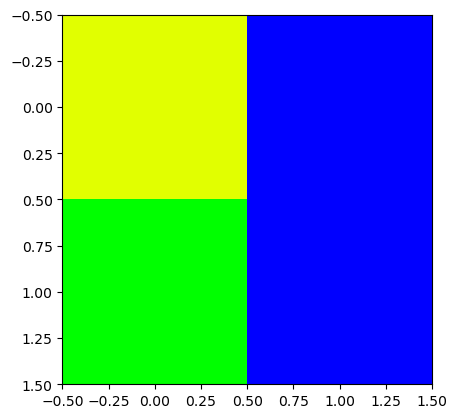

In [29]:
# tensor로 인덱싱
a=torch.tensor([1,2,3,4,5])
A=a[2]
print(A)
A=a[ torch.tensor(2) ] # torch.tensor를 안에다가?

# 텐서로 인덱싱을 할경우 그 범위만큼 그대로 그 위치에 있는 텐서를 가져오게 된다.

print(A)
A=a[ torch.tensor([2,3,4]) ]
print(A)
A=a[ torch.tensor([[2,2,2],[3,3,3]]) ]
print(A) # 인덱싱된 애들로 2행 3열짜리 행렬을 만든다

a=[1,2,3]
# a[[1,1,1,2,2,2]] # error!

a=torch.tensor([[1,2,3],[4,5,6]])
print(a[ torch.tensor(0) ])
A=a[ torch.tensor([0,1]), torch.tensor([1,1]) ]
print(A.shape) # 예를 들어, a[0] = tensor([1,2,3])과 같이 1차원 데이터이므로 한 차원이 늘어나서 2,2, "3"이 된다!
print(A) # segmentation 결과 그림 보여줄 때 사용!

# b에서 색상 지정하고, 이를 segmentation할때 사용
b=torch.tensor([[225,255,0],
                [0,255,0],
                [0,0,255],
                [255,0,255],
                [70,80,75],
                [0,0,4],
                [60,100,255]])
import matplotlib.pyplot as plt
plt.imshow(b[ torch.tensor([[0,2],
                            [1,2]]) ])

In [26]:
# 위와 동일한 (5, 3) 텐서 a
a = torch.tensor([[ 0,  1,  2],
                  [10, 11, 12],
                  [20, 21, 22],
                  [30, 31, 32],
                  [40, 41, 42]])

# (2,1) 위치의 원소와 (3,2) 위치의 원소를 선택
# 행 인덱스: [2, 3]
# 열 인덱스: [1, 2]
A = a[
    torch.tensor([2, 3]),  # 행(row) 인덱스
    torch.tensor([1, 2])   # 열(column) 인덱스
]

print(A)

tensor([21, 32])


In [31]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 텐서로 인덱싱하기
A = a[torch.tensor([[0, 1],  # 0번 행, 1번 행 가져오기
                    [1, 1]])] # 1번 행, 1번 행 가져오기

# 리스트로 인덱싱하기
B = a[[[[[0, 0, 0],
         [1, 1, 1]],
        [[1, 1, 1],
         [1, 1, 1]]], # 행부분

                    [[[0, 1, 2],
                      [0, 1, 2]],
                     [[0, 1, 2],
                      [0, 1, 2]]]]] # 열부분

# 결과는 같음
print(A)
print(B)

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[4, 5, 6],
         [4, 5, 6]]])


### 파이토치 함수들

In [2]:
import torch

A = torch.randn(3,3) # 정규분포에서 샘플링해서 3x3행렬 만들기(표준정규분포)
B = torch.rand(3,3) # 0에서 1사이 uniform
print(A)
print(B)

tensor([[-0.4131,  0.3832,  0.7016],
        [ 0.5455, -2.6631,  0.1982],
        [ 0.2418,  0.4543, -3.0484]])
tensor([[0.5748, 0.0031, 0.8272],
        [0.4235, 0.0558, 0.0755],
        [0.7875, 0.5685, 0.1512]])


In [3]:
# 파이토치 함수안에는 텐서만 넣어야함.
A=torch.randn(3,3)
print(A)
print(torch.abs(A))
print(torch.sqrt(torch.abs(A)))
print(torch.exp(A))
print(torch.log(torch.abs(A)))
print(torch.log(torch.exp(torch.tensor(1))))  # torch.exp(torch.tensor(1)) = e^1
print(torch.log10(torch.tensor(10)))
print(torch.log2(torch.tensor(2)))
print(torch.round(A)) # 반올림
print(torch.round(A,decimals=2)) # 소수점 둘째자리까지
print(torch.floor(A)) # 내림
print(torch.ceil(A)) # 올림

tensor([[ 0.1575,  1.1758,  1.6290],
        [-0.8271,  0.5659,  0.4426],
        [-1.1336, -1.2640,  1.4722]])
tensor([[0.1575, 1.1758, 1.6290],
        [0.8271, 0.5659, 0.4426],
        [1.1336, 1.2640, 1.4722]])
tensor([[0.3968, 1.0844, 1.2763],
        [0.9095, 0.7523, 0.6653],
        [1.0647, 1.1243, 1.2134]])
tensor([[1.1705, 3.2408, 5.0986],
        [0.4373, 1.7611, 1.5568],
        [0.3219, 0.2825, 4.3589]])
tensor([[-1.8485,  0.1620,  0.4879],
        [-0.1898, -0.5692, -0.8151],
        [ 0.1254,  0.2343,  0.3868]])
tensor(1.0000)
tensor(1.)
tensor(1.)
tensor([[ 0.,  1.,  2.],
        [-1.,  1.,  0.],
        [-1., -1.,  1.]])
tensor([[ 0.1600,  1.1800,  1.6300],
        [-0.8300,  0.5700,  0.4400],
        [-1.1300, -1.2600,  1.4700]])
tensor([[ 0.,  1.,  1.],
        [-1.,  0.,  0.],
        [-2., -2.,  1.]])
tensor([[ 1.,  2.,  2.],
        [-0.,  1.,  1.],
        [-1., -1.,  2.]])


In [4]:
a = torch.randn(6, 1)
print(a)
a_sorted = torch.sort(a, dim=0) # torch.sort
print(a_sorted)

a = torch.randn(6, 1)
print(a)
print(a.sort(dim=0)) # a.sort() 위꺼와 사실상 똑같다.
print(a.sort(dim=0, descending=True))

print(torch.max(a))
print(a.max())
print(torch.abs(a))
print(a.abs())


tensor([[0.2727],
        [0.6525],
        [2.2573],
        [2.3223],
        [0.4334],
        [0.1813]])
torch.return_types.sort(
values=tensor([[0.1813],
        [0.2727],
        [0.4334],
        [0.6525],
        [2.2573],
        [2.3223]]),
indices=tensor([[5],
        [0],
        [4],
        [1],
        [2],
        [3]]))
tensor([[-0.9500],
        [-0.3961],
        [ 0.4306],
        [-0.2839],
        [-0.4059],
        [ 0.1161]])
torch.return_types.sort(
values=tensor([[-0.9500],
        [-0.4059],
        [-0.3961],
        [-0.2839],
        [ 0.1161],
        [ 0.4306]]),
indices=tensor([[0],
        [4],
        [1],
        [3],
        [5],
        [2]]))
torch.return_types.sort(
values=tensor([[ 0.4306],
        [ 0.1161],
        [-0.2839],
        [-0.3961],
        [-0.4059],
        [-0.9500]]),
indices=tensor([[2],
        [5],
        [3],
        [1],
        [4],
        [0]]))
tensor(0.4306)
tensor(0.4306)
tensor([[0.9500],
        [0.3961],
        

In [5]:
A = torch.randint(1, 5, size=(12, )) # 1부터 5미만 12개 정수 (1차원은 (N, )과 같이 표현)
print(A)
print(A.shape)

B = A.reshape(2, 2, 3)
print(B)
print(B.ndim) # 3차원 행렬이다

tensor([1, 3, 2, 4, 4, 2, 4, 2, 2, 1, 1, 2])
torch.Size([12])
tensor([[[1, 3, 2],
         [4, 4, 2]],

        [[4, 2, 2],
         [1, 1, 2]]])
3


In [6]:
A = torch.arange(20, )
print(A)
print(A.reshape(4, 5))
print(A.reshape(4, -1).shape) # 4개 행이 되도록 열의 수를 맞춰준다!
print(A.reshape(2, 5, -1).shape)
print(A.reshape(2, -1, 5).shape)
print(A.reshape(1, -1).shape) # 2차원 행 벡터
print(A.reshape(-1, 1).shape) # 2차원 열 벡터
# -1은 한번만 사용가능, 요소 갯수는 고정이니 한번만 가능

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
torch.Size([4, 5])
torch.Size([2, 5, 2])
torch.Size([2, 2, 5])
torch.Size([1, 20])
torch.Size([20, 1])


In [7]:
# 내적하는 법
# 방법 1 : 각각 요소 곱하고 더하기
a = torch.Tensor([1, 2, 3])
b = torch.Tensor([2, 2, 1])
print(torch.sum(a * b))

# 방법 2
a = a.reshape(3, 1)
b = b.reshape(3, 1)
print(a.transpose(1, 0) @ b) # transpose(1,0) : 1차원과 0차원을 바꾼다. 2개만 바꿀수 있음
print(a.permute(1, 0) @ b) # 차원의 순서를 변경, 더 큰 차원에서도 가능
print(a.T @ b) # Transpose인데 큰차원에서도 가능
print(a.t() @ b) # 2차원 텐서에만 사용 가능한 transpose

A = torch.randn(4, 3, 6)
print(A.permute(0, 2, 1).shape)
print(A.transpose(2, 1).shape) # transpose 는 둘끼리 자리 바꾸기만 가능

tensor(9.)
tensor([[9.]])
tensor([[9.]])
tensor([[9.]])
tensor([[9.]])
torch.Size([4, 6, 3])
torch.Size([4, 6, 3])


In [8]:
x = torch.randn(2,3,4,5,6)
print(x[1,2,:,:,:].shape) # 차원 전부 선택하는거면 전부 선택할거여면 :로 하면됨
print(x[1,2,...].shape)

# x[1, 2, ...]는 x[1, 2, :, :, :]와 같습니다.
print(x[:,:,:,:,3].shape)

print(x[...,3].shape)

# x[..., 3]는 x[:, :, :, :, 3]와 같습니다.
print(x[1,:,:,3,:].shape)
print(x[1,...,3,:].shape) # x[1, ..., 3, :]는 x[1, :, :, 3, :]와 같습니다.

torch.Size([4, 5, 6])
torch.Size([4, 5, 6])
torch.Size([2, 3, 4, 5])
torch.Size([2, 3, 4, 5])
torch.Size([3, 4, 6])
torch.Size([3, 4, 6])


In [9]:
A = torch.ones(3, 4)
B = torch.zeros(3, 4)
C = torch.vstack([A, B])
D = torch.hstack([A, B])
# v는 0번째 차원
# h는 1번째 차원에 쌓는다. (A,B 사이즈 (2,3,4)로 추가 해보기)
# 즉 v는 행방향으로 쌓기, h는 열방향으로 쌓기

# cat이 더 일반적인 방법, 차원을 정해서 쌓을 수 있음.
# 3차원 이상에서는
E = torch.cat([A, B], dim=0)
F = torch.cat([A, B], dim=1)

print(C)
print(D)
print(E)
print(F)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.]])


In [10]:
# squeeze 함수 : 1짜리 차원을 업애주는 역할
A = torch.randn(1,1,1,3,1,1,1,4,1,1,1)
# print(A)
print(A.shape)
print(A.squeeze().shape)
print(A.squeeze(dim=(0,2,4,5)).shape)  # 차원을 지정해서 없앨수도 있음

torch.Size([1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1])
torch.Size([3, 4])
torch.Size([1, 3, 1, 4, 1, 1, 1])


In [11]:
# unsqueeze : 1짜리 차원을 더해주는 역할, n차원 앞에 1차원이 추가됨
A = torch.randn(3,4)
print(A.unsqueeze(dim=0).shape)
print(A.unsqueeze(dim=1).shape)
print(A.unsqueeze(dim=2).shape)

# reshape로 해도 똑같긴하지만 나머지 차원도 써줘야한다는 차이가 있다.
print(A.reshape(1,3,4).shape)
print(A.reshape(3,1,4).shape)
print(A.reshape(3,4,1).shape)

torch.Size([1, 3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4, 1])
torch.Size([1, 3, 4])
torch.Size([3, 1, 4])
torch.Size([3, 4, 1])


In [12]:
# clone() 함수 :
A = torch.tensor(([[1, 2], [3, 4]]))
B = A # 이렇게 하면 주소까지 같이 복사됨, 즉 동일한 변수가 됨
B[0, 0] = 100

print(B)
print(A)


tensor([[100,   2],
        [  3,   4]])
tensor([[100,   2],
        [  3,   4]])


In [13]:
A = torch.tensor(([[1, 2], [3, 4]]))
B = A.clone() # 이렇게 해야 B만 바뀜
B[0, 0] = 100

print(B)
print(A)

tensor([[100,   2],
        [  3,   4]])
tensor([[1, 2],
        [3, 4]])


In [14]:
# 일반적인 행렬의 곱연산
A = torch.randn(5, 7)
B = torch.randn(7, 10)
C = A @ B
print(C.shape)

# 32개를 5x7 @ 7x10 을 각각 계산해서 5x10 32개가 나옴
A = torch.randn(32, 5, 7)
B = torch.randn(32, 7, 10)
C = A @ B
print(C.shape)

torch.Size([5, 10])
torch.Size([32, 5, 10])


In [15]:
A = torch.randn(32, 5, 7)
B = torch.randn(7, 10) # 이렇게하면 7, 10가 32개 복제돼서 계산됨

C = A @ B
print(C.shape)


torch.Size([32, 5, 10])
